In [2]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%pdb off

from pyCascade import probePost, physics, utils, probeReadWrite
from pyCascade.probeReadWrite import read_probes_file_switch
from filloutVentilationStats import *
from matplotlib import pyplot as plt
from matplotlib import cm, colors
import numpy as np
import scipy as sp
import os
from IPython.core.debugger import set_trace
import pandas as pd
import seaborn as sns
from cycler import cycler
import plotly.express as px
import plotly
import plotly.graph_objects as go
from plotly.offline import plot
from plotly.subplots import make_subplots
from IPython.display import display, HTML
import statsmodels.api as sm
plotly.offline.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))

plt.rcParams['figure.dpi'] = 140
im_scaling = .75
plt.rcParams['figure.figsize'] = [6.4 * im_scaling, 4.8 * im_scaling]

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)
plt.close('all')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Automatic pdb calling has been turned OFF


'/scratch/users/nbachand/Cascade/city_block_cfd'

'/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd'

In [3]:
hm = 6
window_dim = hm/2/4
velTenMeters = 4


In [4]:
runs = {
    # 234: {'B': False, 'detT': 0, 'A': 0,  'WS': 4, 'C': 2},
    # 233: {'B': False, 'detT': 0, 'A': 45, 'WS': 4, 'C': 2},
    # 236: {'B': False, 'detT': 0, 'A': 0,  'WS': 2, 'C': 2},
    # 221: {'B': True,  'detT': 4, 'A': 0,  'WS': 4, 'C': 2},
    # 222: {'B': False, 'detT': 0, 'A': 45, 'WS': 2, 'C': 2},
    # 223: {'B': True,  'detT': 4, 'A': 0,  'WS': 2, 'C': 2},
    # 224: {'B': True,  'detT': 4, 'A': 45, 'WS': 2, 'C': 2},
    # 225: {'B': True,  'detT': 4, 'A': 45, 'WS': 4, 'C': 2},
    # 227: {'B': True,  'detT': 4, 'A': 45, 'WS': 6, 'C': 2},
    # 228: {'B': True,  'detT': 4, 'A': 0,  'WS': 6, 'C': 2},
    # 229: {'B': False, 'detT': 0, 'A': 0,  'WS': 6, 'C': 2},
    # 230: {'B': False, 'detT': 0, 'A': 45, 'WS': 6, 'C': 2},
    # 305: {'B': False, 'detT': 0, 'A': 0,  'WS': 4, 'C': 3},
    # 306: {'B': False, 'detT': 0, 'A': 45, 'WS': 4, 'C': 3},
    # 307: {'B': False, 'detT': 0, 'A': 0,  'WS': 2, 'C': 3},
    # 308: {'B': False, 'detT': 0, 'A': 45, 'WS': 2, 'C': 3},
}

runs = {
    221: {'B': True,  'delT': 4, 'delTPart': 2,  'A': 0, 'WS': 4, 'C': 2},
    234: {'B': False, 'delT': 0, 'delTPart': 0,  'A': 0, 'WS': 4, 'C': 2},
    235: {'B': True,  'delT': 1, 'delTPart': .5, 'A': 0, 'WS': 2, 'C': 2},
    237: {'B': True,  'delT': 1, 'delTPart': 1,  'A': 0, 'WS': 2, 'C': 2},
    236: {'B': False, 'delT': 0, 'delTPart': 0,  'A': 0, 'WS': 2, 'C': 2},
    225: {'B': True,  'delT': 4, 'delTPart': 2,  'A': 45,'WS': 4, 'C': 2},
    233: {'B': False, 'delT': 0, 'delTPart': 0,  'A': 45,'WS': 4, 'C': 2},
    239: {'B': True,  'delT': 1, 'delTPart': .5, 'A': 45,'WS': 2, 'C': 2},
    238: {'B': True,  'delT': 1, 'delTPart': 1,  'A': 45,'WS': 2, 'C': 2},
    222: {'B': False, 'delT': 0, 'delTPart': 0,  'A': 45,'WS': 2, 'C': 2},
    311: {'B': True,  'delT': 4, 'delTPart': 2,  'A': 0, 'WS': 4, 'C': 3},
    305: {'B': False, 'delT': 0, 'delTPart': 0,  'A': 0, 'WS': 4, 'C': 3},
    312: {'B': True,  'delT': 1, 'delTPart': .5, 'A': 0, 'WS': 2, 'C': 3},
    # 237: {'B': True,  'delT': 1, 'delTPart': 1,  'A': 0, 'WS': 2, 'C': 3},
    307: {'B': False, 'delT': 0, 'delTPart': 0,  'A': 0, 'WS': 2, 'C': 3},
    309: {'B': True,  'delT': 4, 'delTPart': 2,  'A': 45,'WS': 4, 'C': 3},
    306: {'B': False, 'delT': 0, 'delTPart': 0,  'A': 45,'WS': 4, 'C': 3},
    310: {'B': True,  'delT': 1, 'delTPart': .5, 'A': 45,'WS': 2, 'C': 3},
    # 238: {'B': True,  'delT': 1, 'delTPart': 1,  'A': 45,'WS': 2, 'C': 3},
    # 313: {'B': False, 'delT': 0, 'delTPart': 0,  'A': 45,'WS': 2, 'C': 3},
    304: {'B': False, 'delT': 0, 'delTPart': 0,  'A': 45,'WS': 2, 'C': 3},
}

# plotFolder = f"{home_dir}/CHARLES/multiPlots/"
plotFolder = f"{home_dir}/CHARLES/multiPlots/quickRiCompare/"

In [5]:
allFlowStats = {}
allRoomVentilation = {}
for i, run in enumerate(runs):
    C = runs[run]['C']
    category = f"config{C}"
    R = run % 100
    probes_dir = f'{home_dir}/CHARLES/{category}/R{R}/probes/probesOut_parquet'
    locations_dir = f'{scratch_dir}/CHARLES/{category}/R{R}/probes/locations'
    print(probes_dir)
    flowStatsPath = f"{probes_dir}/../flowStats.csv"
    roomVentilationPath = f"{probes_dir}/../roomVentiation.csv"
    if os.path.exists(roomVentilationPath) and os.path.exists(flowStatsPath):
        roomVentilation = pd.read_csv(roomVentilationPath, index_col=0)
        flowStats = pd.read_csv(flowStatsPath, index_col=0)
    else:
        raise Exception(f"Run {run} does not has associated ventilation files. Run createVentilationStats.slurm from run folder first.")
        
    allFlowStats[run] = flowStats
    allRoomVentilation[run] = roomVentilation


/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R21/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R34/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R35/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R37/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R36/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R25/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R33/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R39/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config2/R38/probes/probesOut_parquet
/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARL

In [6]:
flowStatsMI = pd.concat(allFlowStats.values(), keys=allFlowStats.keys())
roomVentilationMI = pd.concat(allRoomVentilation.values(), keys=allRoomVentilation.keys())

display(flowStatsMI["EPR_mag"])
display(roomVentilationMI)


221  xwindow_0-0_h_0--1    3.110367
     zwindow_0-0_h_0--1    3.110367
     zwindow_2-0_h_0--1    3.110367
     zwindow_2-1_h_0--1    3.110367
     xwindow_0-1_h_0--1    3.110367
                             ...   
304  xwindow_0-1_sl_Bz     2.163213
     zwindow_0-1_sl_Bz     2.163213
     zwindow_1-1_sl_Bz     2.163213
     skylight_1-0_sl_Bz    2.163213
     zwindow_1-0_sl_Bz     2.163213
Name: EPR_mag, Length: 3888, dtype: float64

mean       net  \
221 corner_h_0--1_B  0.029428  0.076572   
    cross_h_0--1_B   0.009872  0.063867   
    dual_h_0--1_B    0.054422  0.117264   
    single_h_0--1_B  0.000199  0.000289   
    corner_h_0--2_B  0.014308  0.088117   
...                       ...       ...   
304 single_h_0-2_Bz  0.000002  0.000200   
    corner_sl_Bz     0.096714  0.097922   
    cross_sl_Bz      0.231203  0.238637   
    dual_sl_Bz       0.140652  0.173304   
    single_sl_Bz     0.022504  0.030750   

                                                             EP_normal  \
221 corner_h_0--1_B                  [-0.27160278, 0.1165600142980866]   
    cross_h_0--1_B                 [0.08302476660420982, -0.021972435]   
    dual_h_0--1_B     [-0.37828079476428333, 0.017496681, 0.025365584]   
    single_h_0--1_B                               [0.1009199747364242]   
    corner_h_0--2_B                         [-0.35750207, 0.036202246]   
...                                                                ...   
304 single_h_0-2_Bz                              [0.35551729123712006]   
    corner_sl_Bz     [-0.3878157630807833, -0.33066993894560565, 0....   
    cross_sl_Bz      [-0.03685617593397768, 0.06339234891496892, 0....   
    dual_sl_Bz       [-0.051235379736886806, 0.17844979497084654, -...   
    single_sl_Bz           [-0.26512418087829426, 0.26877227299542905]   

                     EP_shear   EPR_mag houseType blockType roomType  \
221 corner_h_0--1_B  1.697419  3.110367      0--1         B   corner   
    cross_h_0--1_B   2.660225  3.110367      0--1         B    cross   
    dual_h_0--1_B    2.650366  3.110367      0--1         B     dual   
    single_h_0--1_B  1.411405  3.110367      0--1         B   single   
    corner_h_0--2_B  1.667260  3.596527      0--2         B   corner   
...                       ...       ...       ...       ...      ...   
304 single_h_0-2_Bz  1.339668  2.153969       0-2        Bz   single   
    corner_sl_Bz     3.954469  2.163213        sl        Bz   corner   
    cross_sl_Bz      5.868216  2.163213        sl        Bz    cross   
    dual_sl_Bz       3.976486  2.163213        sl        Bz     dual   
    single_sl_Bz     3.374165  2.163213        sl        Bz   single   

                              x         y          z  nWindows  contResid  \
221 corner_h_0--1_B   47.015594  1.497615  33.055550         2   0.000460   
    cross_h_0--1_B    55.999773  1.497595  36.035254         2  -0.000817   
    dual_h_0--1_B     48.675774  1.500022  39.306152         3   0.000068   
    single_h_0--1_B   51.998942  1.495154  32.111106         1  -0.000398   
    corner_h_0--2_B   55.016136  1.500000   9.022450         2   0.000483   
...                         ...       ...        ...       ...        ...   
304 single_h_0-2_Bz  158.027310  1.498000 -89.999996         1   0.000004   
    corner_sl_Bz      87.348088  1.997507 -61.366875         3   0.002270   
    cross_sl_Bz       90.006064  2.249397 -70.002921         4  -0.000558   
    dual_sl_Bz        92.788748  2.098468 -63.219839         5  -0.000423   
    single_sl_Bz      87.024574  2.249533 -66.000996         2   0.000151   

                     EP_normal_mag  EP_normal_sum  EP_normal_ratio  
221 corner_h_0--1_B       0.388163       0.155043         0.714578  
    cross_h_0--1_B        0.104997       0.061052         0.632325  
    dual_h_0--1_B         0.421143       0.335419         0.556654  
    single_h_0--1_B       0.100920       0.100920         0.500000  
    corner_h_0--2_B       0.393704       0.321300         0.550632  
...                            ...            ...              ...  
304 single_h_0-2_Bz       0.355517       0.355517         0.500000  
    corner_sl_Bz          1.248645       0.188326         0.868942  
    cross_sl_Bz           1.694849       0.186777         0.900736  
    dual_sl_Bz            0.802765       0.099815         0.889411  
    single_sl_Bz          0.533896       0.003648         0.993213  



In [7]:

flowStatsMI = getWindowOrientations(flowStatsMI)
roomVentilationMI = getRoomOrientations(roomVentilationMI)

flowStatsMI = fillInParams(flowStatsMI, runs, velTenMeters)
roomVentilationMI = fillInParams(roomVentilationMI, runs, velTenMeters)

flowStatsMI["roomA"] = flowStatsMI["roomOrientation"] + flowStatsMI["A"]

for param in ["mean", "net"]:
    flowStatsMI[f"{param}NormEP"] = flowStatsMI[param] / flowStatsMI["EP_mag"] * velTenMeters
    roomVentilationMI[f"{param}NormEP"] = roomVentilationMI[param] / roomVentilationMI["EP_normal_mag"] * velTenMeters

flowStatsMI.to_csv(f'{plotFolder}flowStatsMI.csv')
roomVentilationMI.to_csv(f'{plotFolder}roomVentilationMI.csv')

flowStatsMI["houseType"].replace(["0--2", "0--1", "0-0", "0-1", "0-2"], ['3-0', '3-1', '3-2', '3-3', '3-4'], inplace = True)
roomVentilationMI["houseType"].replace(["0--2", "0--1", "0-0", "0-1", "0-2"], ['3-0', '3-1', '3-2', '3-3', '3-4'], inplace = True)


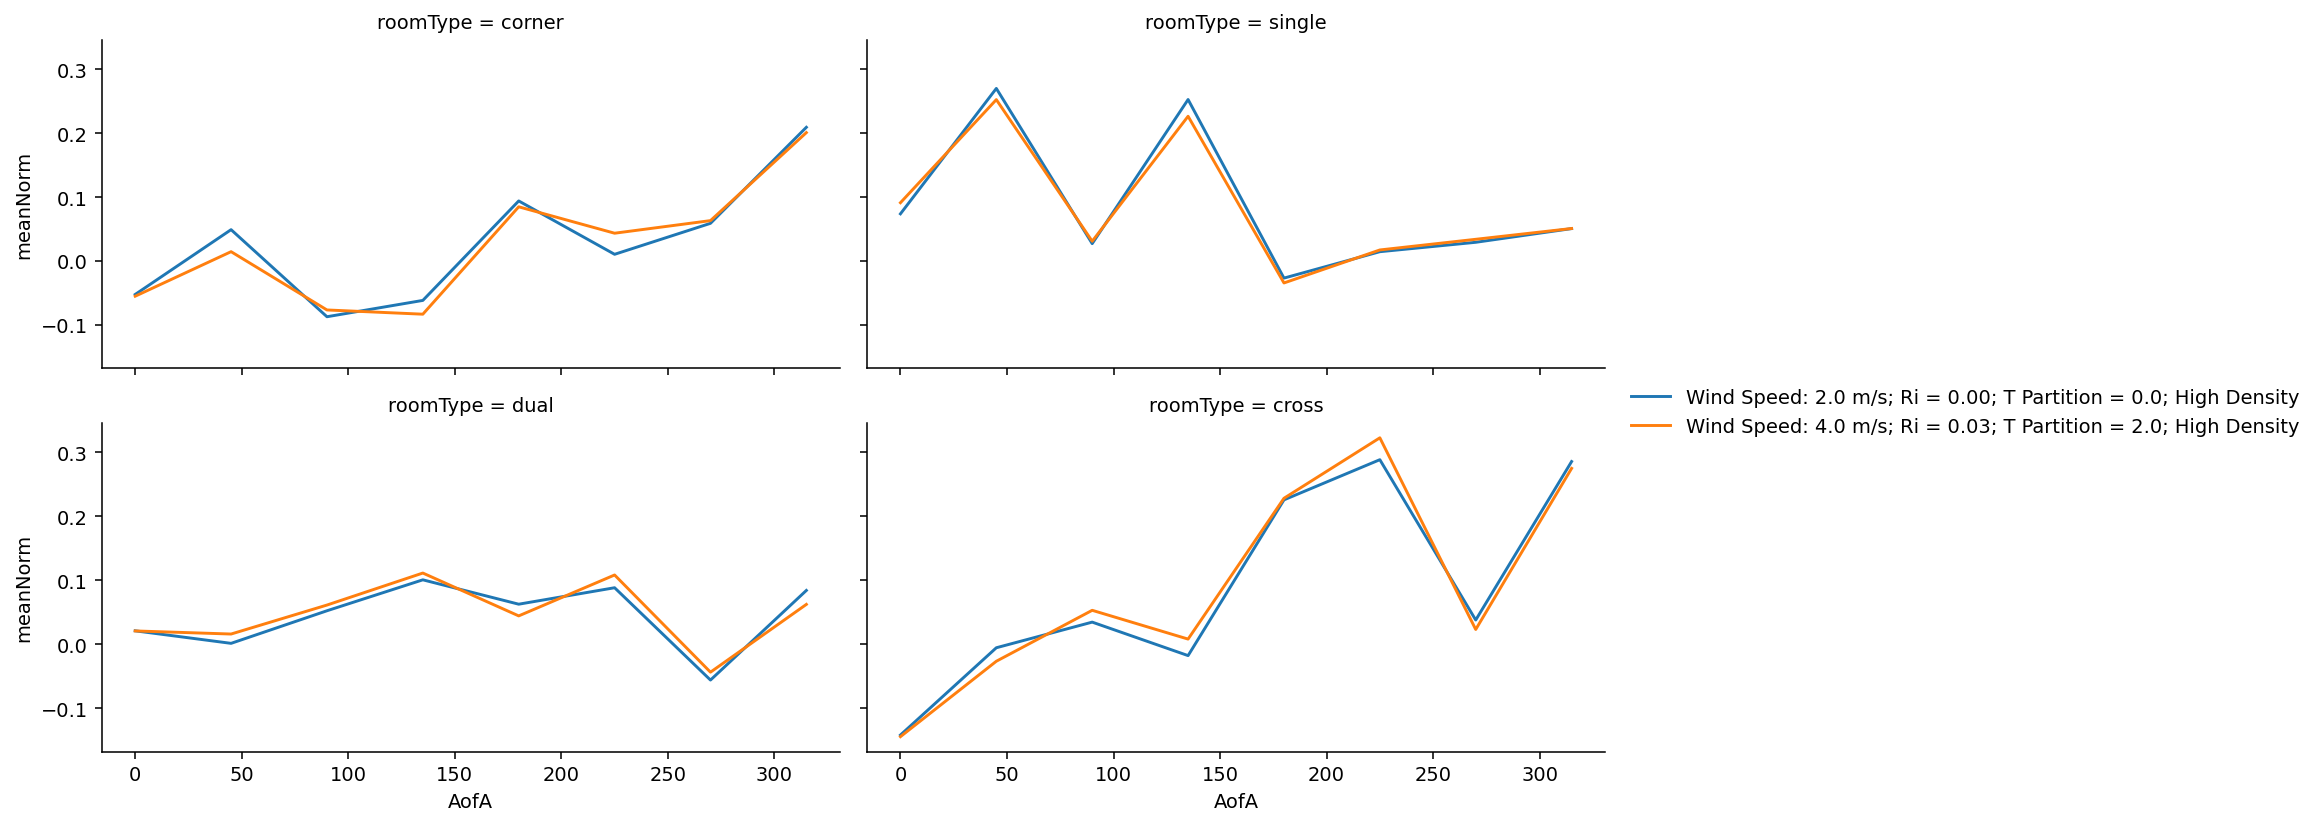

In [8]:
paramGroup = ["Wind Speed: 2.0 m/s; Ri = 0.00; T Partition = 0.0; High Density", "Wind Speed: 4.0 m/s; Ri = 0.03; T Partition = 2.0; High Density"]

for iBool in [True, False]:
    plotdf = flowStatsMI[flowStatsMI["AofA"]%1 == 0]
    plotdf = plotdf[plotdf["houseType"] == "sl"]
    # plotdf = plotdf[plotdf["roomType"] == "corner"]
    plotdf = plotdf[plotdf["Params"].isin(paramGroup) == iBool]

    plotdfGrouped = plotdf.groupby(["roomType", "houseType", "Params", "AofA"], as_index=False).mean(numeric_only = True)
    g = sns.FacetGrid(plotdfGrouped, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 2, legend_out = True)
    # g.map(sns.violinplot, "meanNorm", "houseType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
    g.map(sns.lineplot, "AofA", "meanNorm", "Params", palette = "tab10")
    g.add_legend()

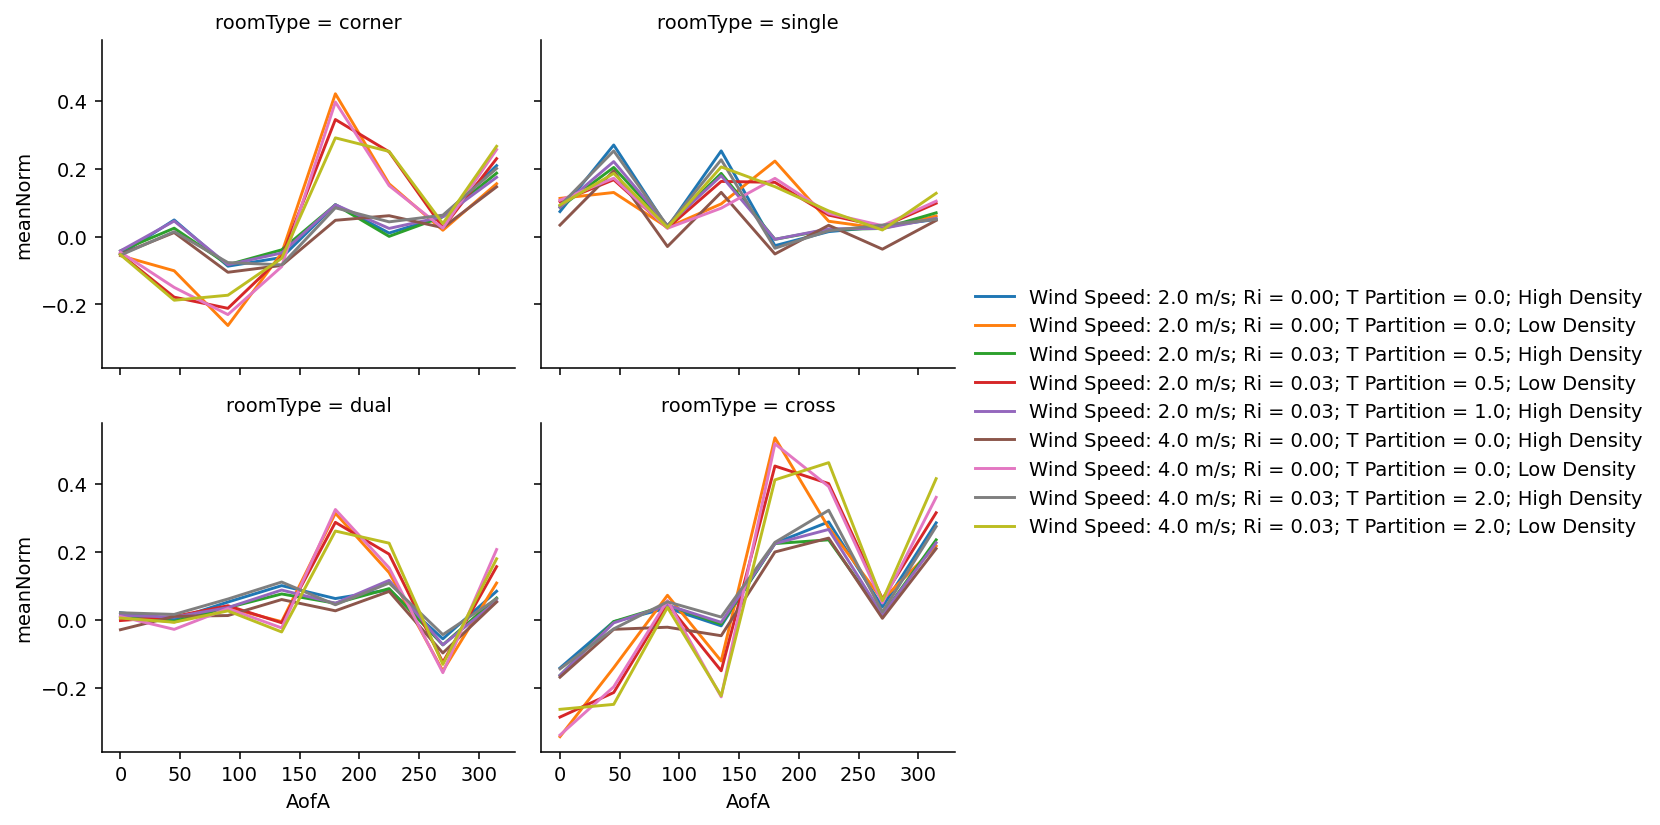

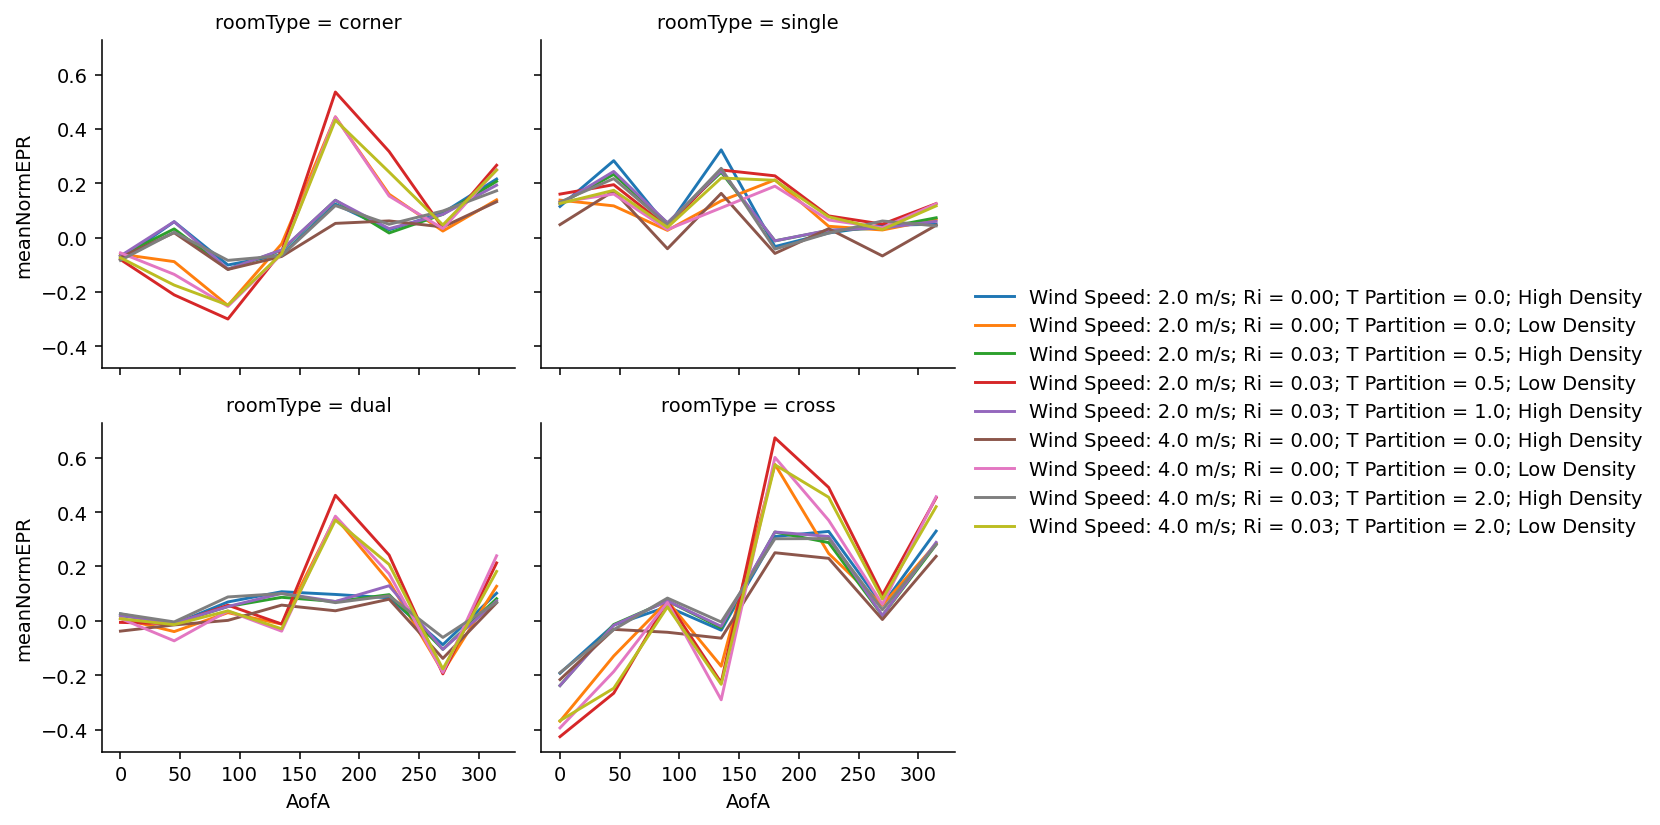

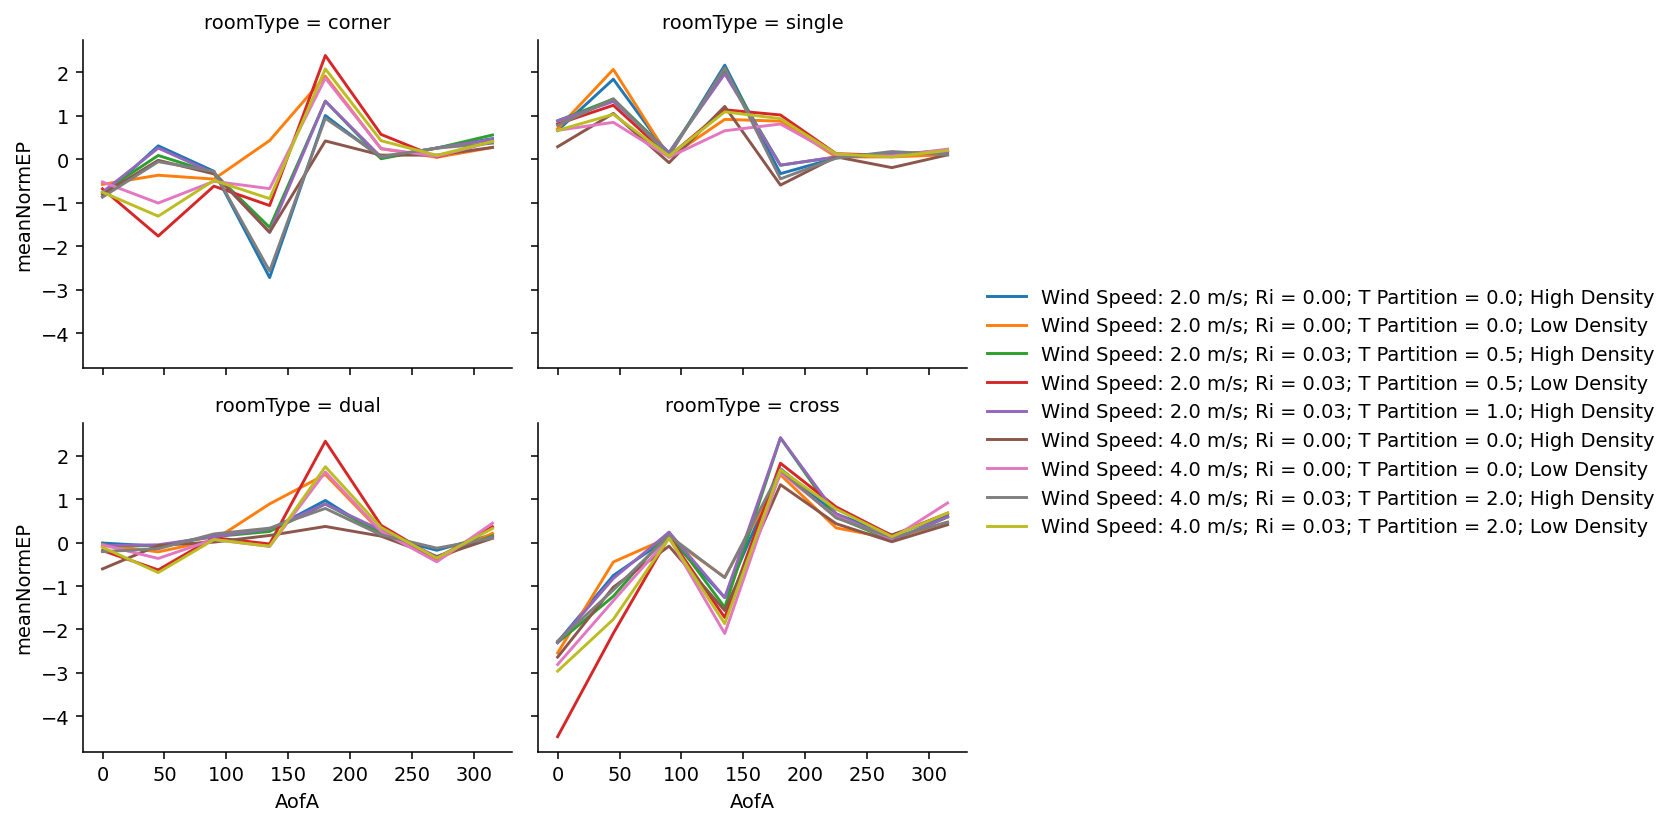

In [9]:
plotdf = flowStatsMI[flowStatsMI["AofA"]%1 == 0]
plotdf = plotdf[plotdf["houseType"] == "sl"]

plotdfGrouped = plotdf.groupby(["roomType", "houseType", "Params", "AofA"], as_index=False).mean(numeric_only = True)
g = sns.FacetGrid(plotdfGrouped, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
# g.map(sns.violinplot, "meanNorm", "houseType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
g.map(sns.lineplot, "AofA", "meanNorm", "Params", palette = "tab10")
g.add_legend()

plotdfGrouped = plotdf.groupby(["roomType", "houseType", "Params", "AofA"], as_index=False).mean(numeric_only = True)
g = sns.FacetGrid(plotdfGrouped, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
# g.map(sns.violinplot, "meanNorm", "houseType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
g.map(sns.lineplot, "AofA", "meanNormEPR", "Params", palette = "tab10")
g.add_legend()

plotdfGrouped = plotdf.groupby(["roomType", "houseType", "Params", "AofA"], as_index=False).mean(numeric_only = True)
g = sns.FacetGrid(plotdfGrouped, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
# g.map(sns.violinplot, "meanNorm", "houseType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
g.map(sns.lineplot, "AofA", "meanNormEP", "Params", palette = "tab10")
g.add_legend()

In [10]:
plotdf = roomVentilationMI[roomVentilationMI["houseType"] == "sl"]

plotdf = plotdf.sort_values(["Params"])
fig1 = px.bar_polar(plotdf, r="netNorm", theta="AofA",
                   color="roomType", template="plotly_dark", pattern_shape = "WS",
                   color_discrete_sequence= px.colors.sequential.Viridis)
fig1.show()

fig2 = px.bar_polar(plotdf, r="netNorm", theta="AofA",
                   color="roomType", template="plotly_dark", pattern_shape = "B",
                   color_discrete_sequence= px.colors.sequential.Viridis)
fig2.show()

In [11]:
plotdf = plotdf.sort_values(["houseType", "Params"])
# plotdf = plotdf.sort_values("Params")
color_labels = ["Params"]
for i, color_label in enumerate(color_labels):
    plotdf_frac = plotdf.copy()
    fracN = plotdf_frac.shape[0] / (len(set(plotdf_frac["roomType"])) * len(set(plotdf_frac["AofA"])))
    plotdf_frac[["netNorm", "meanNorm"]] = plotdf_frac[["netNorm", "meanNorm"]] / fracN
    rooms = ["corner", "single", "dual", "cross"]
    # params = set(plotdf[color_label])
    # marker_color=px.colors.qualitative.Safe #["#E4FF87", '#709BFF', '#709BFF', '#FFAA70', '#FFAA70', '#FFDF70', '#B6FFB4']
    # color_map = {}
    # for i, param in enumerate(params):
    #     color_map[i] = marker_color[i]
    # color_map = px.colors.sequential.Viridis

    figures = []
    for i, room in enumerate(rooms):
        fig = px.bar_polar(plotdf_frac[plotdf_frac["roomType"] == room], r="netNorm", theta="AofA",
                    color=color_label, template="plotly_dark", hover_data = ["houseType"],
                    color_discrete_sequence=px.colors.qualitative.Safe, title=room)
        figures.append(fig)

    fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2, subplot_titles=rooms, vertical_spacing=0.2)

    for i, figure in enumerate(figures):
        for trace in range(len(figure["data"])):
            room = rooms[i]
            row = int((i/2)+1)
            col = int((i%2)+1)
            # print(row, col)
            trace = figure["data"][trace]
            if i>0:
                trace.showlegend = False
            fig.add_trace(trace, row=row, col=col)
            fig.update_annotations(y=1.05 - (row-1)/1.65, selector={'text':room})

    # fig.update_polars(radialaxis_dtick=.1, radialaxis_range=[0,.5])
    fig.update_polars(radialaxis_nticks=5, radialaxis_range=[0,.7])
    fig.update_layout(width = 1000, height = 800)


    fig.show()
    fig.write_image(f'{plotFolder}radialByParams.png', scale=2)
    
    # print(fig)

In [12]:
plotdf = plotdf.sort_values(["houseType", "Params"])
# plotdf = plotdf.sort_values("Params")
color_labels = ["Params"]
for i, color_label in enumerate(color_labels):
    plotdf_frac = plotdf.copy()
    fracN = plotdf_frac.shape[0] / (len(set(plotdf_frac["roomType"])) * len(set(plotdf_frac["AofA"])))
    plotdf_frac[["netNorm", "meanNorm", "netNormEPR", "meanNormEPR"]] = plotdf_frac[["netNorm", "meanNorm", "netNormEPR", "meanNormEPR"]] / fracN
    rooms = ["corner", "single", "dual", "cross"]
    # params = set(plotdf[color_label])
    # marker_color=px.colors.qualitative.Safe #["#E4FF87", '#709BFF', '#709BFF', '#FFAA70', '#FFAA70', '#FFDF70', '#B6FFB4']
    # color_map = {}
    # for i, param in enumerate(params):
    #     color_map[i] = marker_color[i]
    # color_map = px.colors.sequential.Viridis

    figures = []
    for i, room in enumerate(rooms):
        plotdf_frac_room = plotdf_frac[plotdf_frac["roomType"] == room]
        fig = px.bar_polar(plotdf_frac_room, r="netNormEPR", theta="AofA",
                    color=color_label, template="plotly_dark", hover_data = ["houseType"],
                    color_discrete_sequence=px.colors.qualitative.Safe, title=room)
        figures.append(fig)

    fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2, subplot_titles=rooms, vertical_spacing=0.2)

    for i, figure in enumerate(figures):
        for trace in range(len(figure["data"])):
            room = rooms[i]
            row = int((i/2)+1)
            col = int((i%2)+1)
            # print(row, col)
            trace = figure["data"][trace]
            if i>0:
                trace.showlegend = False
            fig.add_trace(trace, row=row, col=col)
            fig.update_annotations(y=1.05 - (row-1)/1.65, selector={'text':room})

    # fig.update_polars(radialaxis_dtick=.1, radialaxis_range=[0,.5])
    fig.update_polars(radialaxis_nticks=5, radialaxis_range=[0,.75])
    fig.update_layout(width = 1000, height = 800)


    fig.show()
    fig.write_image(f'{plotFolder}radialByParamsEPR.png', scale=2)
    
    # print(fig)

In [13]:
plotdf = roomVentilationMI[roomVentilationMI["houseType"].isin(["sl", "3-2"])]

dfCompHT, valuesHT = getComparativeDf(plotdf, ["houseType"])
dfCompHT["netNorm"]

fig = px.scatter(x = dfCompHT[('netNorm', *valuesHT[0])], y = dfCompHT[('netNorm', *valuesHT[1])], symbol = indMulti(dfCompHT.index, ['roomType']), color = indMulti(dfCompHT.index, ['roomType']), hover_data = indMulti(dfCompHT.index, ['AofA', 'WS']))

fig.add_shape(type="line",
              x0=0, 
              y0=0, 
              x1=np.max(dfCompHT["netNorm"]), 
              y1=np.max(dfCompHT["netNorm"]))

fig.update_layout(
    # xaxis_title=r'$\text{Normalized Ventilation Rate} V_{10) = 2 m/s$',
    xaxis_title=r'$\text{No Skylights; Normalized Ventilation Rate } [\frac{Q}{U_{10}A}]$',
    yaxis_title=r'$\text{Skylights; Normalized Ventilation Rate } [\frac{Q}{U_{10}A}]$',
    # legend_title=r'Room Type',
)
fig.show()
fig.write_image(f'{plotFolder}scatterHT_2-4.png', scale=2)

split ['houseType'] along values:  [('3-2',), ('sl',)]


In [14]:

categorizeBy = ["C", "roomType"]
categoryValues = [plotdf[category].unique() for category in categorizeBy]
splitAlong = ["houseType"]
splitInd = [0, 1]
figures = []
for i, v0 in enumerate(categoryValues[0]):
    for j, v1 in enumerate(categoryValues[1]):
        plotdfSplit = plotdf[((plotdf[categorizeBy[0]] == v0) & (plotdf[categorizeBy[1]] == v1))]
        dfComp, values = getComparativeDf(plotdfSplit, splitAlong)
        color = indMulti(dfComp.index, ['Ri'])
        fig = px.scatter(x = dfComp['netNorm'].iloc[:,splitInd[0]], y = dfComp['netNorm'].iloc[:,splitInd[1]], 
            color = color, symbol = indMulti(dfComp.index, ['Ri']),  hover_data = indMulti(dfComp.index, ['C', 'roomType', 'AofA', 'delTPartRatio']))
        figures.append(fig)

num_rows = len(categoryValues[0])
num_cols = len(categoryValues[1])

titleText = []
for CValue in categoryValues[1]:
    text = f"{categorizeBy[1]} = "
    if isinstance(CValue, float):
        text = f"{text}{np.round(CValue, 2)}"
    else:
        text = f"{text}{CValue}"
    titleText.append(text)

fig = make_subplots(rows=num_rows, cols=num_cols, vertical_spacing=0.2)#, subplot_titles=titleText)

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        row = int(i / num_cols) + 1  # Calculate row index
        col = (i % num_cols) + 1  # Calculate column index
        # print(row, col)
        trace = figure["data"][trace]
        if i>0:
            trace.showlegend = False
        fig.add_trace(trace, row=row, col=col)
        # fig.update_annotations(y=1.05 - (row-1)/1.65, selector={'text':room})

# fig.update_polars(radialaxis_dtick=.1, radialaxis_range=[0,.4])
# fig.update_polars(radialaxis_nticks=5, radialaxis_range=[0,.4])
fig.update_layout(width = 1000, height = 800, title_text = f"{splitAlong[0]} {values[splitInd[0]][0]} vs {values[splitInd[1]][0]}")
fig.update_coloraxes(colorscale = "mrybm", colorbar_orientation = "h", colorbar_y = -0.2, cmin = 0, cmax = 360)

fig.add_shape(type="line",
    x0=0, 
    y0=0, 
    x1=np.max(plotdf["netNorm"]) * 1.2, 
    y1=np.max(plotdf["netNorm"]) * 1.2,
    col = "all",
    row = "all")

# Update x-axis and y-axis properties for each subplot
for i, v0 in enumerate(categoryValues[0]):
    yLabelText = f"{categorizeBy[0]} = {v0}"
    fig.update_yaxes(title_text=yLabelText, row=i+1, col=1)  # Add y-axis label

for j, v1 in enumerate(categoryValues[1]):
    xLabelText = f"{categorizeBy[1]} = {v1}"
    fig.update_xaxes(title_text=xLabelText, row=num_rows, col=j+1)  # Add x-axis label

fig.show()

split ['houseType'] along values:  [('3-2',), ('sl',)]
split ['houseType'] along values:  [('3-2',), ('sl',)]
split ['houseType'] along values:  [('3-2',), ('sl',)]
split ['houseType'] along values:  [('3-2',), ('sl',)]
split ['houseType'] along values:  [('3-2',), ('sl',)]
split ['houseType'] along values:  [('3-2',), ('sl',)]
split ['houseType'] along values:  [('3-2',), ('sl',)]
split ['houseType'] along values:  [('3-2',), ('sl',)]


In [15]:
plotdf = roomVentilationMI[roomVentilationMI["houseType"] == "sl"]
for CValue in [2,3]:
    dfCompWS, valuesWS = getComparativeDf(plotdf[plotdf["C"] == CValue], ["WS"])
    fig = px.scatter(x = dfCompWS[('netNorm', *valuesWS[0])], y = dfCompWS[('netNorm', *valuesWS[1])], symbol = indMulti(dfCompWS.index, ['C']), color = indMulti(dfCompWS.index, ['Ri']), hover_data = indMulti(dfCompWS.index, ['Ri', 'AofA', 'C']))

    fig.add_shape(type="line",
                x0=0, 
                y0=0, 
                x1=np.max(dfCompWS["netNorm"]), 
                y1=np.max(dfCompWS["netNorm"]))

    fig.update_layout(
        # xaxis_title=r'$\text{Normalized Ventilation Rate} V_{10) = 2 m/s$',
        xaxis_title=r'$U_{10} = 2 m/s, \text{Normalized Ventilation Rate } [\frac{Q}{U_{10}A}]$',
        yaxis_title=r'$U_{10} = 4 m/s, \text{Normalized Ventilation Rate } [\frac{Q}{U_{10}A}]$',
        # legend_title=r'Room Type',
    )
    fig.show()
    fig.write_image(f'{plotFolder}scatterWS_2-4.png', scale=2)


    # fig = px.scatter(x = dfCompWS[('netNorm', *valuesWS[1])], y = dfCompWS[('netNorm', *valuesWS[2])], symbol = indMulti(dfCompWS.index, ['roomType']), color = indMulti(dfCompWS.index, ['Ri']), hover_data = indMulti(dfCompWS.index, ['Ri, 'AofA']))

    # fig.add_shape(type="line",
    #               x0=0, 
    #               y0=0, 
    #               x1=np.max(dfCompWS["netNorm"]), 
    #               y1=np.max(dfCompWS["netNorm"]))

    # fig.update_layout(
    #     # xaxis_title=r'$\text{Normalized Ventilation Rate} V_{10) = 2 m/s$',
    #     xaxis_title=r'$U_{10} = 4 m/s, \text{Normalized Ventilation Rate } [\frac{Q}{U_{10}A}]$',
    #     yaxis_title=r'$U_{10} = 6 m/s, \text{Normalized Ventilation Rate } [\frac{Q}{U_{10}A}]$',
    #     # legend_title=r'Room Type',
    # )
    # fig.show()
    # fig.write_image(f'{plotFolder}scatterWS_4-6.png', scale=2)

split ['WS'] along values:  [(4.0,), (2.0,)]


split ['WS'] along values:  [(4.0,), (2.0,)]


In [16]:

categorizeBy = ["C", "roomType"]
categoryValues = [plotdf[category].unique() for category in categorizeBy]
splitAlong = ["WS"]
splitInd = [0, 1]
figures = []
for i, v0 in enumerate(categoryValues[0]):
    for j, v1 in enumerate(categoryValues[1]):
        plotdfSplit = plotdf[((plotdf[categorizeBy[0]] == v0) & (plotdf[categorizeBy[1]] == v1))]
        dfComp, values = getComparativeDf(plotdfSplit, splitAlong)
        color = indMulti(dfComp.index, ['Ri'])
        fig = px.scatter(x = dfComp['netNorm'].iloc[:,splitInd[0]], y = dfComp['netNorm'].iloc[:,splitInd[1]], 
            color = color, symbol = indMulti(dfComp.index, ['Ri']),  hover_data = indMulti(dfComp.index, ['C', 'roomType', 'AofA', 'delTPartRatio']))
        figures.append(fig)

num_rows = len(categoryValues[0])
num_cols = len(categoryValues[1])

titleText = []
for CValue in categoryValues[1]:
    text = f"{categorizeBy[1]} = "
    if isinstance(CValue, float):
        text = f"{text}{np.round(CValue, 2)}"
    else:
        text = f"{text}{CValue}"
    titleText.append(text)

fig = make_subplots(rows=num_rows, cols=num_cols, vertical_spacing=0.2)#, subplot_titles=titleText)

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        row = int(i / num_cols) + 1  # Calculate row index
        col = (i % num_cols) + 1  # Calculate column index
        # print(row, col)
        trace = figure["data"][trace]
        if i>0:
            trace.showlegend = False
        fig.add_trace(trace, row=row, col=col)
        # fig.update_annotations(y=1.05 - (row-1)/1.65, selector={'text':room})

# fig.update_polars(radialaxis_dtick=.1, radialaxis_range=[0,.4])
# fig.update_polars(radialaxis_nticks=5, radialaxis_range=[0,.4])
fig.update_layout(width = 1000, height = 800, title_text = f"{splitAlong[0]} {values[splitInd[0]][0]} vs {values[splitInd[1]][0]}")
fig.update_coloraxes(colorscale = "mrybm", colorbar_orientation = "h", colorbar_y = -0.2, cmin = 0, cmax = 360)

fig.add_shape(type="line",
    x0=0, 
    y0=0, 
    x1=np.max(plotdf["netNorm"]) * 1.2, 
    y1=np.max(plotdf["netNorm"]) * 1.2,
    col = "all",
    row = "all")

# Update x-axis and y-axis properties for each subplot
for i, v0 in enumerate(categoryValues[0]):
    yLabelText = f"{categorizeBy[0]} = {v0}"
    fig.update_yaxes(title_text=yLabelText, row=i+1, col=1)  # Add y-axis label

for j, v1 in enumerate(categoryValues[1]):
    xLabelText = f"{categorizeBy[1]} = {v1}"
    fig.update_xaxes(title_text=xLabelText, row=num_rows, col=j+1)  # Add x-axis label

fig.show()

split ['WS'] along values:  [(4.0,), (2.0,)]
split ['WS'] along values:  [(4.0,), (2.0,)]
split ['WS'] along values:  [(4.0,), (2.0,)]
split ['WS'] along values:  [(4.0,), (2.0,)]
split ['WS'] along values:  [(4.0,), (2.0,)]
split ['WS'] along values:  [(4.0,), (2.0,)]
split ['WS'] along values:  [(4.0,), (2.0,)]
split ['WS'] along values:  [(4.0,), (2.0,)]


In [17]:
plotdf = plotdf.sort_values(["Params", "houseType"])

categorizeBy = ["C", "roomType"]
categoryValues = [plotdf[category].unique() for category in categorizeBy]
splitAlong = ["WS"]
splitInd = [0, 1]
figures = []
for i, v0 in enumerate(categoryValues[0]):
    for j, v1 in enumerate(categoryValues[1]):
        plotdfSplit = plotdf[((plotdf[categorizeBy[0]] == v0) & (plotdf[categorizeBy[1]] == v1))]
        dfComp, values = getComparativeDf(plotdfSplit, splitAlong)
        color = indMulti(dfComp.index, ['AofA']).astype(float)
        fig = px.scatter(x = dfComp['netNorm'].iloc[:,splitInd[0]], y = dfComp['netNorm'].iloc[:,splitInd[1]], 
            color = color, symbol = indMulti(dfComp.index, ['Ri']),  hover_data = indMulti(dfComp.index, ['C', 'roomType', 'AofA', 'delTPartRatio']))
        figures.append(fig)

num_rows = len(categoryValues[0])
num_cols = len(categoryValues[1])

titleText = []
for CValue in categoryValues[1]:
    text = f"{categorizeBy[1]} = "
    if isinstance(CValue, float):
        text = f"{text}{np.round(CValue, 2)}"
    else:
        text = f"{text}{CValue}"
    titleText.append(text)

fig = make_subplots(rows=num_rows, cols=num_cols, vertical_spacing=0.2)#, subplot_titles=titleText)

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        row = int(i / num_cols) + 1  # Calculate row index
        col = (i % num_cols) + 1  # Calculate column index
        # print(row, col)
        trace = figure["data"][trace]
        if i>0:
            trace.showlegend = False
        fig.add_trace(trace, row=row, col=col)
        # fig.update_annotations(y=1.05 - (row-1)/1.65, selector={'text':room})

# fig.update_polars(radialaxis_dtick=.1, radialaxis_range=[0,.4])
# fig.update_polars(radialaxis_nticks=5, radialaxis_range=[0,.4])
fig.update_layout(width = 1000, height = 800, title_text = f"{splitAlong[0]} {values[splitInd[0]][0]} vs {values[splitInd[1]][0]}")
fig.update_coloraxes(colorscale = "mrybm", colorbar_orientation = "h", colorbar_y = -0.2, cmin = 0, cmax = 360)

fig.add_shape(type="line",
    x0=0, 
    y0=0, 
    x1=np.max(plotdf["netNorm"]) * 1.2, 
    y1=np.max(plotdf["netNorm"]) * 1.2,
    col = "all",
    row = "all")

# Update x-axis and y-axis properties for each subplot
for i, v0 in enumerate(categoryValues[0]):
    yLabelText = f"{categorizeBy[0]} = {v0}"
    fig.update_yaxes(title_text=yLabelText, row=i+1, col=1)  # Add y-axis label

for j, v1 in enumerate(categoryValues[1]):
    xLabelText = f"{categorizeBy[1]} = {v1}"
    fig.update_xaxes(title_text=xLabelText, row=num_rows, col=j+1)  # Add x-axis label

fig.show()

split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]


In [25]:
plotdf = plotdf.sort_values(["Params", "houseType"])

categorizeBy = ["C", "roomType"]
categoryValues = [plotdf[category].unique() for category in categorizeBy]
splitAlong = ["WS"]
splitInd = [0, 1]
figures = []
for i, v0 in enumerate(categoryValues[0]):
    for j, v1 in enumerate(categoryValues[1]):
        plotdfSplit = plotdf[((plotdf[categorizeBy[0]] == v0) & (plotdf[categorizeBy[1]] == v1))]
        dfComp, values = getComparativeDf(plotdfSplit, splitAlong)
        # color = indMulti(dfComp.index, ['AofA']).astype(float)
        color = indMulti(dfComp.index, ['Ri'])
        fig = px.scatter(x = dfComp['EP_normal_mag'].iloc[:,splitInd[0]] / values[0], y = dfComp['EP_normal_mag'].iloc[:,splitInd[1]] / values[1], 
            color = color, symbol = indMulti(dfComp.index, ['Ri']),  hover_data = indMulti(dfComp.index, ['C', 'roomType', 'AofA', 'delTPartRatio']))
        figures.append(fig)

num_rows = len(categoryValues[0])
num_cols = len(categoryValues[1])

titleText = []
for CValue in categoryValues[1]:
    text = f"{categorizeBy[1]} = "
    if isinstance(CValue, float):
        text = f"{text}{np.round(CValue, 2)}"
    else:
        text = f"{text}{CValue}"
    titleText.append(text)

fig = make_subplots(rows=num_rows, cols=num_cols, vertical_spacing=0.2)#, subplot_titles=titleText)

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        row = int(i / num_cols) + 1  # Calculate row index
        col = (i % num_cols) + 1  # Calculate column index
        # print(row, col)
        trace = figure["data"][trace]
        if i>0:
            trace.showlegend = False
        fig.add_trace(trace, row=row, col=col)
        # fig.update_annotations(y=1.05 - (row-1)/1.65, selector={'text':room})

# fig.update_polars(radialaxis_dtick=.1, radialaxis_range=[0,.4])
# fig.update_polars(radialaxis_nticks=5, radialaxis_range=[0,.4])
fig.update_layout(width = 1000, height = 800, title_text = f"{splitAlong[0]} {values[splitInd[0]][0]} vs {values[splitInd[1]][0]}")
fig.update_coloraxes(colorscale = "mrybm", colorbar_orientation = "h", colorbar_y = -0.2, cmin = 0, cmax = 360)

fig.add_shape(type="line",
    x0=0, 
    y0=0, 
    x1=np.max(plotdf["EP_normal_mag"]) / 4 * 1.2, 
    y1=np.max(plotdf["EP_normal_mag"]) / 4 * 1.2,
    col = "all",
    row = "all")

# Update x-axis and y-axis properties for each subplot
for i, v0 in enumerate(categoryValues[0]):
    yLabelText = f"{categorizeBy[0]} = {v0}"
    fig.update_yaxes(title_text=yLabelText, row=i+1, col=1)  # Add y-axis label

for j, v1 in enumerate(categoryValues[1]):
    xLabelText = f"{categorizeBy[1]} = {v1}"
    fig.update_xaxes(title_text=xLabelText, row=num_rows, col=j+1)  # Add x-axis label

fig.show()

split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]


In [26]:
plotdf = plotdf.sort_values(["Params", "houseType"])

categorizeBy = ["C", "roomType"]
categoryValues = [plotdf[category].unique() for category in categorizeBy]
splitAlong = ["WS"]
splitInd = [0, 1]
figures = []
for i, v0 in enumerate(categoryValues[0]):
    for j, v1 in enumerate(categoryValues[1]):
        plotdfSplit = plotdf[((plotdf[categorizeBy[0]] == v0) & (plotdf[categorizeBy[1]] == v1))]
        dfComp, values = getComparativeDf(plotdfSplit, splitAlong)
        # color = indMulti(dfComp.index, ['AofA']).astype(float)
        color = indMulti(dfComp.index, ['Ri'])
        fig = px.scatter(x = dfComp['EP_shear'].iloc[:,splitInd[0]] / values[0], y = dfComp['EP_shear'].iloc[:,splitInd[1]] / values[1], 
            color = color, symbol = indMulti(dfComp.index, ['Ri']),  hover_data = indMulti(dfComp.index, ['C', 'roomType', 'AofA', 'delTPartRatio']))
        figures.append(fig)

num_rows = len(categoryValues[0])
num_cols = len(categoryValues[1])

titleText = []
for CValue in categoryValues[1]:
    text = f"{categorizeBy[1]} = "
    if isinstance(CValue, float):
        text = f"{text}{np.round(CValue, 2)}"
    else:
        text = f"{text}{CValue}"
    titleText.append(text)

fig = make_subplots(rows=num_rows, cols=num_cols, vertical_spacing=0.2)#, subplot_titles=titleText)

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        row = int(i / num_cols) + 1  # Calculate row index
        col = (i % num_cols) + 1  # Calculate column index
        # print(row, col)
        trace = figure["data"][trace]
        if i>0:
            trace.showlegend = False
        fig.add_trace(trace, row=row, col=col)
        # fig.update_annotations(y=1.05 - (row-1)/1.65, selector={'text':room})

# fig.update_polars(radialaxis_dtick=.1, radialaxis_range=[0,.4])
# fig.update_polars(radialaxis_nticks=5, radialaxis_range=[0,.4])
fig.update_layout(width = 1000, height = 800, title_text = f"{splitAlong[0]} {values[splitInd[0]][0]} vs {values[splitInd[1]][0]}")
fig.update_coloraxes(colorscale = "mrybm", colorbar_orientation = "h", colorbar_y = -0.2, cmin = 0, cmax = 360)

fig.add_shape(type="line",
    x0=0, 
    y0=0, 
    x1=np.max(plotdf["EP_shear"]) / 4 * 1.2, 
    y1=np.max(plotdf["EP_shear"]) / 4 * 1.2,
    col = "all",
    row = "all")

# Update x-axis and y-axis properties for each subplot
for i, v0 in enumerate(categoryValues[0]):
    yLabelText = f"{categorizeBy[0]} = {v0}"
    fig.update_yaxes(title_text=yLabelText, row=i+1, col=1)  # Add y-axis label

for j, v1 in enumerate(categoryValues[1]):
    xLabelText = f"{categorizeBy[1]} = {v1}"
    fig.update_xaxes(title_text=xLabelText, row=num_rows, col=j+1)  # Add x-axis label

fig.show()

split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]


In [19]:
plotdf = plotdf.sort_values(["Params", "houseType"])

splitAlong = ["Ri", "delTPartRatio"]
dfComp, values = getComparativeDf(plotdf, splitAlong)
figures = []
baseInd = 0
for i, v in enumerate(values):
    if i == baseInd:
        continue
    fig = px.scatter(x = dfComp['netNorm'].iloc[:,baseInd], y = dfComp['netNorm'].iloc[:,i], color = indMulti(dfComp.index, ['WS']), hover_data = indMulti(dfComp.index, ['WS', 'AofA']))
    figures.append(fig)

num_rows = 1
num_cols = int(np.ceil((len(values) - 1) / num_rows))

fig = make_subplots(rows=num_rows, cols=num_cols, vertical_spacing=0.2)

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        row = int(i / num_cols) + 1  # Calculate row index
        col = (i % num_cols) + 1  # Calculate column index
        # print(row, col)
        trace = figure["data"][trace]
        if i>0:
            trace.showlegend = False
        fig.add_trace(trace, row=row, col=col)
        # fig.update_annotations(y=1.05 - (row-1)/1.65, selector={'text':room})

# fig.update_polars(radialaxis_dtick=.1, radialaxis_range=[0,.4])
# fig.update_polars(radialaxis_nticks=5, radialaxis_range=[0,.4])
fig.update_layout(width = 1000, height = 800)

fig.add_shape(type="line",
    x0=0, 
    y0=0, 
    x1=np.max(dfComp["netNorm"]) * 1.2, 
    y1=np.max(dfComp["netNorm"]) * 1.2,
    col = "all",
    row = "all")

# Update x-axis and y-axis properties for each subplot
labelText = []
for v in values:
    text = ""
    for i, split in enumerate(splitAlong):
        text = f"{text}{split} = {np.round(v[i], 2)};  "
    text = text[:-3]
    labelText.append(text)
for i, text in enumerate(labelText):
    if i == baseInd:
        continue
    fig.update_xaxes(title_text=labelText[0], row=1, col=i)  # Add x-axis label
    fig.update_yaxes(title_text=text, row=1, col=i)  # Add y-axis label

fig.show()

KeyError occurred: 0.5; Likely a non-issue due to not having all possible split combinations in data
KeyError occurred: 1.0; Likely a non-issue due to not having all possible split combinations in data
KeyError occurred: 0.0; Likely a non-issue due to not having all possible split combinations in data
split ['Ri', 'delTPartRatio'] along values:  [(0.0, 0.0), (0.026028110359187923, 0.5), (0.026028110359187923, 1.0)]


In [23]:
splitAlong = ["Ri", "delTPartRatio"]
# plotdf = plotdf[plotdf["C"] == 2]
dfComp, values = getComparativeDf(plotdf, splitAlong)
figures = []
rows = []
cols = []
for i, v1 in enumerate(values):
    for j, v2 in enumerate(values):
        # if j <= i: # only create plots on or below the diagonal
        rows.append(i+1)
        cols.append(j+1)
        fig = px.scatter(x = dfComp['netNorm'].iloc[:,j], y = dfComp['netNorm'].iloc[:,i], color = indMulti(dfComp.index, ['WS']), symbol = indMulti(dfComp.index, ['C']),  hover_data = indMulti(dfComp.index, ['WS', 'AofA']))
        figures.append(fig)

rows = [r + 1 - min(rows) for r in rows]
num_rows = max(rows)
num_cols = max(cols)

fig = make_subplots(rows=num_rows, cols=num_cols, vertical_spacing=0.2)

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        trace = figure["data"][trace]
        if i>0:
            trace.showlegend = False
        fig.add_trace(trace, row=rows[i], col=cols[i])
        # fig.update_annotations(y=1.05 - (row-1)/1.65, selector={'text':room})

# fig.update_polars(radialaxis_dtick=.1, radialaxis_range=[0,.4])
# fig.update_polars(radialaxis_nticks=5, radialaxis_range=[0,.4])
fig.update_layout(width = 1000, height = 800)

fig.add_shape(type="line",
    x0=0, 
    y0=0, 
    x1=np.max(dfComp["netNorm"]) * 1.2, 
    y1=np.max(dfComp["netNorm"]) * 1.2,
    col = "all",
    row = "all")

# Update x-axis and y-axis properties for each subplot
labelText = []
for v in values:
    text = ""
    for i, split in enumerate(splitAlong):
        text = f"{text}{split} = {np.round(v[i], 2)};  "
    text = text[:-3]
    labelText.append(text)
for i in range(len(labelText)):
    rowInd = num_rows - i
    colInd = i + 1
    fig.update_xaxes(title_text=f'{labelText[i]}', row=num_rows, col=colInd)  # Add x-axis label
    fig.update_yaxes(title_text=f'{labelText[-1-i]}', row=rowInd, col=1)  # Add y-axis label

fig.show()

KeyError occurred: 0.5; Likely a non-issue due to not having all possible split combinations in data
KeyError occurred: 1.0; Likely a non-issue due to not having all possible split combinations in data
KeyError occurred: 0.0; Likely a non-issue due to not having all possible split combinations in data
split ['Ri', 'delTPartRatio'] along values:  [(0.0, 0.0), (0.026028110359187923, 0.5), (0.026028110359187923, 1.0)]


In [24]:
figures = []
vMax = 0
vMax = 0
for i, room in enumerate(rooms):
    dfComp, values = getComparativeDf(plotdf[plotdf["roomType"] == room], ["WS"])
    fig = px.scatter(x = dfComp['netNorm'].iloc[:,0], y = dfComp['netNorm'].iloc[:,1], color = indMulti(dfComp.index, ['Ri']), hover_data = indMulti(dfComp.index, ['houseType', 'AofA']))
    # fig.show()
    vMax = np.max([vMax, np.max(dfComp["netNorm"])])
    figures.append(fig)

fig = make_subplots(rows=2, cols=2, subplot_titles=rooms, vertical_spacing=0.2)

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        room = rooms[i]
        row = int((i/2)+1)
        col = int((i%2)+1)
        # print(row, col)
        trace = figure["data"][trace]
        if i>0:
            trace.showlegend = False
        fig.add_trace(trace, row=row, col=col)
        fig.update_annotations(y=1.05 - (row-1)/1.65, selector={'text':room})

# fig.update_polars(radialaxis_dtick=.1, radialaxis_range=[0,.4])
# fig.update_polars(radialaxis_nticks=5, radialaxis_range=[0,.4])
fig.update_layout(width = 1000, height = 800)

fig.add_shape(type="line",
    x0=0, 
    y0=0, 
    x1=vMax, 
    y1=vMax,
    col = "all",
    row = "all")

fig.show()

split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
split ['WS'] along values:  [(2.0,), (4.0,)]
